In [209]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [210]:
df = pd.read_csv('Insurance Fraud.csv')
pd.set_option('display.max_columns', None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [211]:
df.shape

(1000, 40)

In [212]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [213]:
for i in df.columns: 
    print('Total number of unique values in ', i, ' = ', df[i].nunique())

Total number of unique values in  months_as_customer  =  391
Total number of unique values in  age  =  46
Total number of unique values in  policy_number  =  1000
Total number of unique values in  policy_bind_date  =  951
Total number of unique values in  policy_state  =  3
Total number of unique values in  policy_csl  =  3
Total number of unique values in  policy_deductable  =  3
Total number of unique values in  policy_annual_premium  =  991
Total number of unique values in  umbrella_limit  =  11
Total number of unique values in  insured_zip  =  995
Total number of unique values in  insured_sex  =  2
Total number of unique values in  insured_education_level  =  7
Total number of unique values in  insured_occupation  =  14
Total number of unique values in  insured_hobbies  =  20
Total number of unique values in  insured_relationship  =  6
Total number of unique values in  capital-gains  =  338
Total number of unique values in  capital-loss  =  354
Total number of unique values in  inc

    Here, the Policy Number, Policy bind date, policy annual premium, insured zip, incident location have to be checked. 
    
    All these columns has high number of discrete values, which might not be useful to us.

In [214]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

    Since the column _c39 is full of null values, we can drop that column

In [215]:
df.drop('_c39', inplace = True, axis = 1)

In [216]:
df.shape

(1000, 39)

In [217]:
#Separating numerical and categorical columns
categ_cols = ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 
              'insured_education_level', 'insured_occupation', 'insured_hobbies', 
              'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 
              'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 
              'incident_location', 'property_damage', 'police_report_available', 'auto_make', 
              'auto_model', 'fraud_reported']

numer_cols = ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 
              'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 
              'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 
              'injury_claim', 'property_claim', 'vehicle_claim','auto_year']

    The policy_bind_date is shown as object for some reason. This will need to be checked. 

In [218]:
for i in range(len(categ_cols)):
    print("----- {}-----".format(categ_cols[i]))
    print(df[categ_cols[i]].value_counts())
    print('\n')

----- policy_bind_date-----
01-01-2006    3
28-04-1992    3
05-08-1992    3
30-08-1993    2
28-12-1991    2
             ..
19-06-1996    1
05-07-2001    1
24-05-2003    1
13-04-1991    1
10-05-2009    1
Name: policy_bind_date, Length: 951, dtype: int64


----- policy_state-----
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


----- policy_csl-----
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


----- insured_sex-----
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


----- insured_education_level-----
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


----- insured_occupation-----
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-f

Observation:


    We're able to see a couple of columns with '?' values:
        Collision type - 178
        Property damage - 360
        Police report available - 343
        
            
            
    Policy_bind_date is a date type, but it's being shown as an object. We will have to change this to a datetime type

### Handing the '?' values

In [219]:
df = df.replace('?',np.NaN)

In [220]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [221]:
from sklearn.impute import SimpleImputer

    We will handle Collision_type, Property_damage, and police_report_available in different methods.
    
    This is because colision type can be any of the four types, but property damange and police report availablility can only be seen as negative since the values are not present in the dataset. 

In [222]:
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['collision_type'] = si.fit_transform(df['collision_type'].values.reshape(-1, 1))

    We'll use 'NO' to fill the missing values in property_damage and police_report_availability

In [223]:
df['property_damage'].fillna('NO', inplace = True)

In [224]:
df['police_report_available'].fillna('NO', inplace = True)

In [225]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

### Removing unwanted columns

In [226]:
df = df.drop(['policy_number','policy_bind_date', 
              'incident_date','incident_location','auto_model', 
              'incident_hour_of_the_day'], axis = 1)

    Policy number, Policy Bind date: These values are all unique and discrete, hence these two columns doesn't help the model

    Incident date, Incident location, AUtomodel: The date they claim the insurance, the place the incident occured, and the automodel doesn't contribute any significant insight to fraud detection.


OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


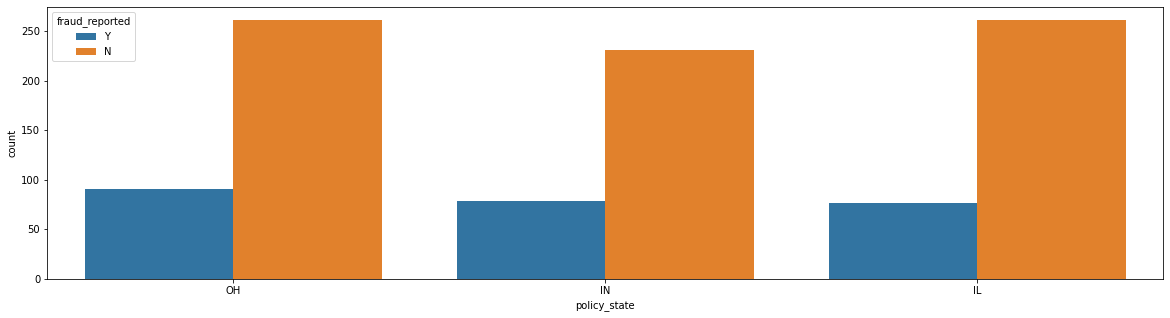

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


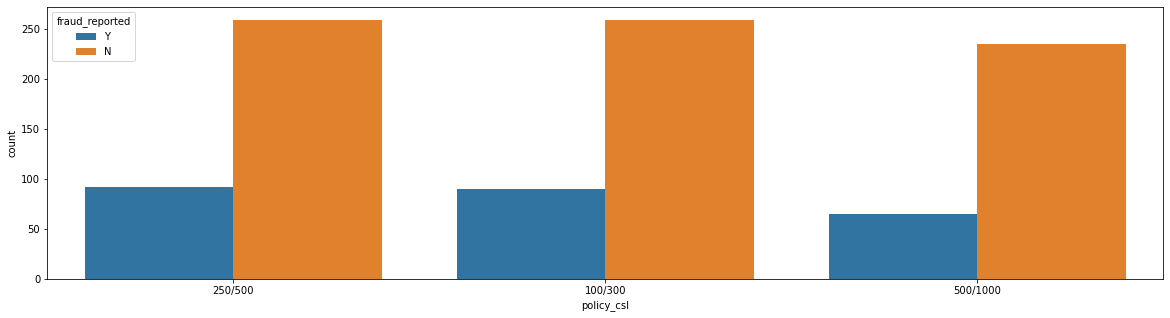

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


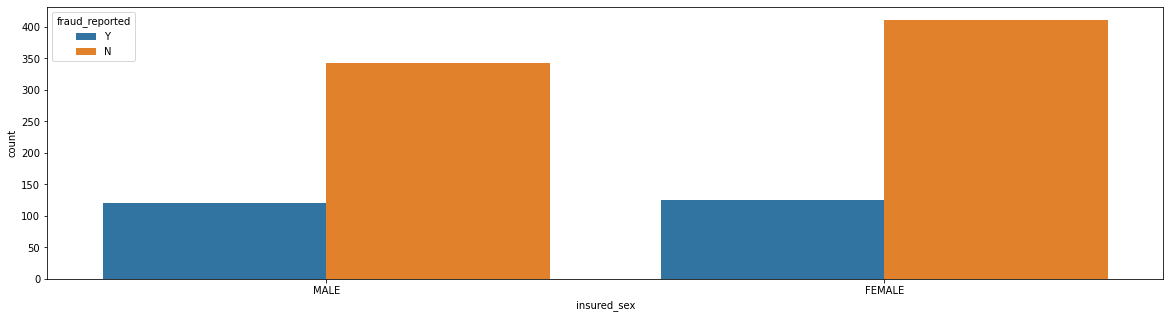

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


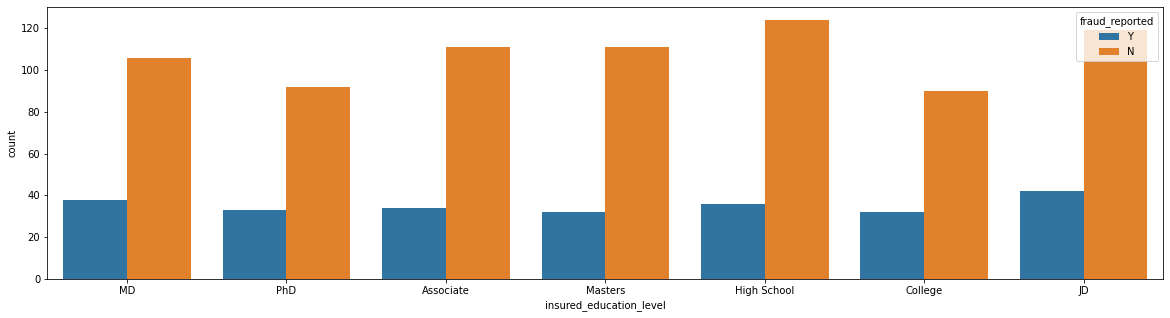

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


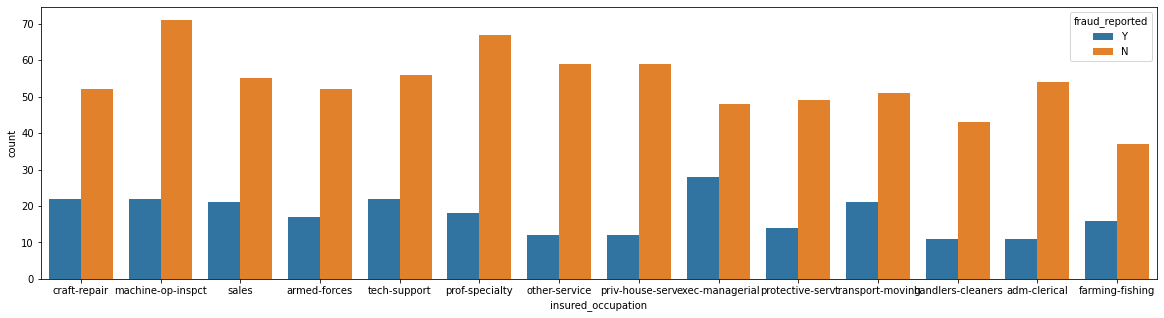

reading           64
paintball         57
exercise          57
bungie-jumping    56
camping           55
golf              55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


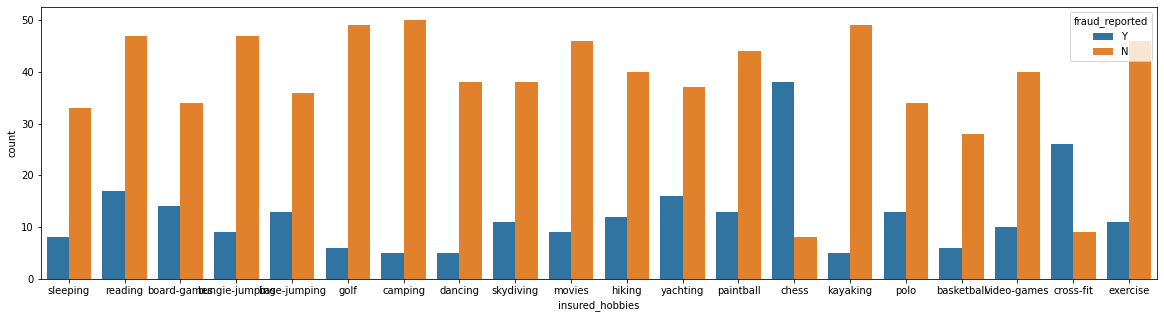

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


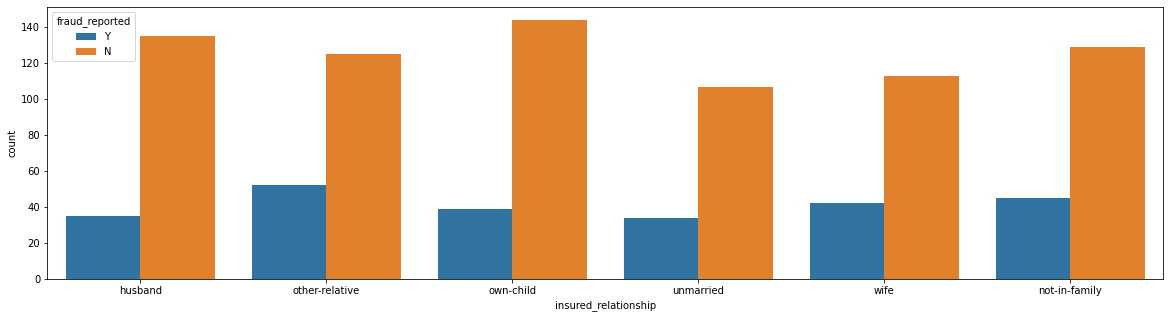

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


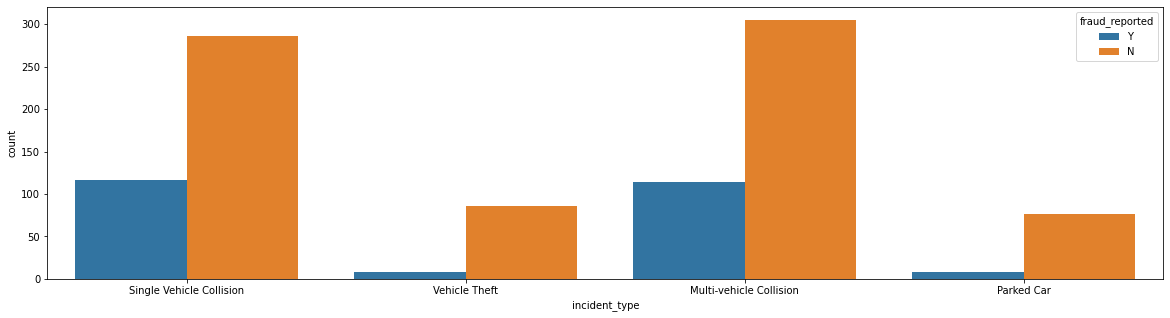

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


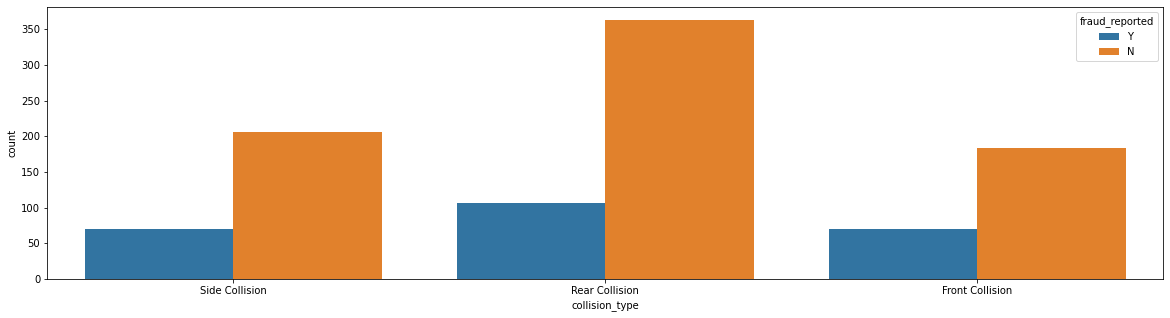

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


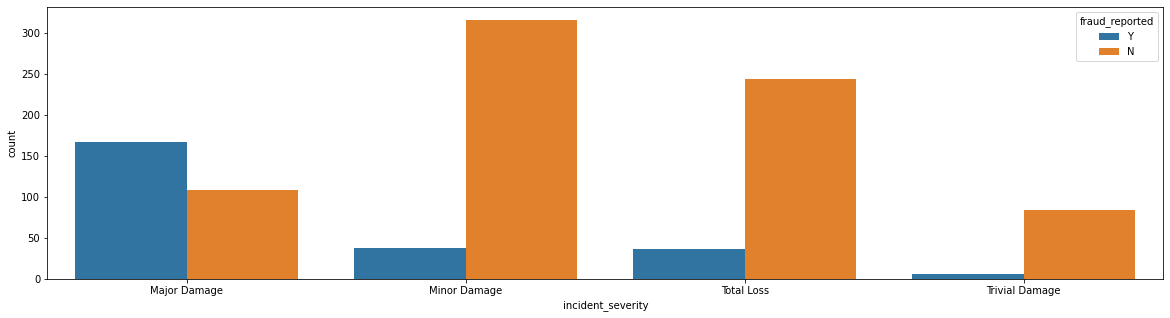

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


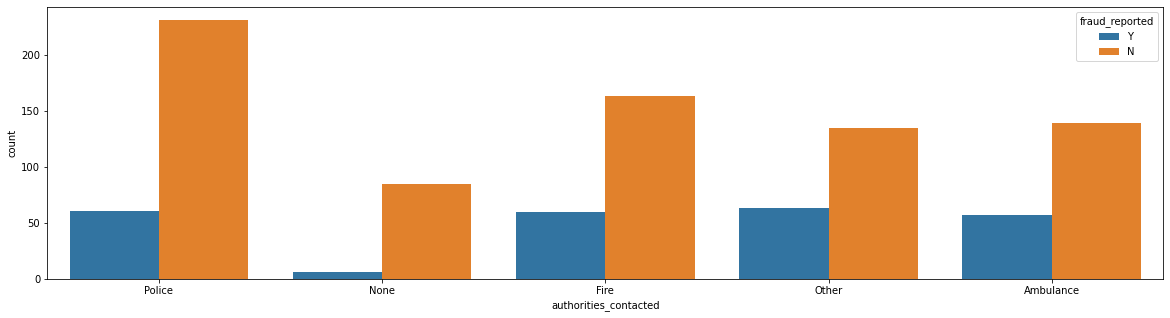

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64


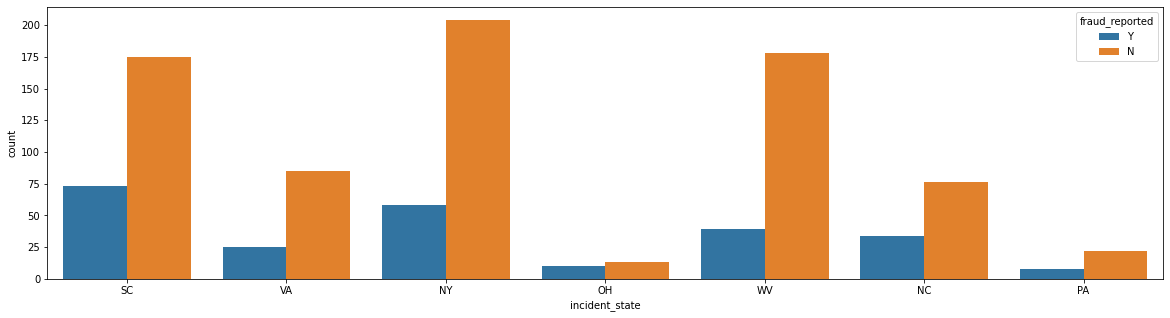

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


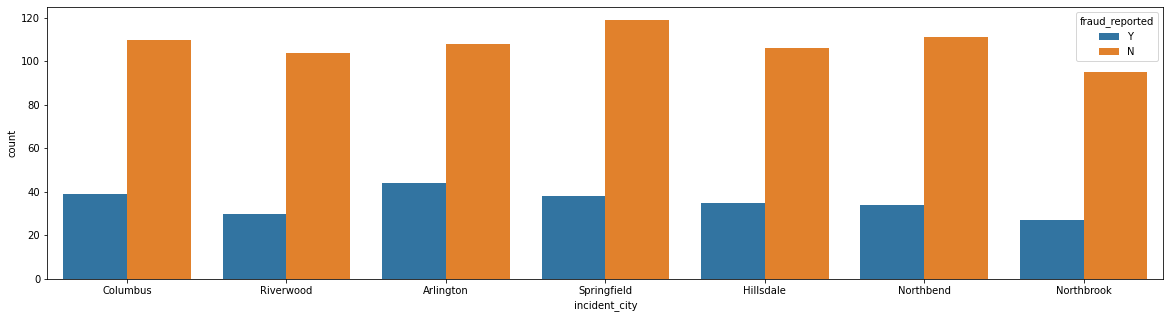

NO     698
YES    302
Name: property_damage, dtype: int64


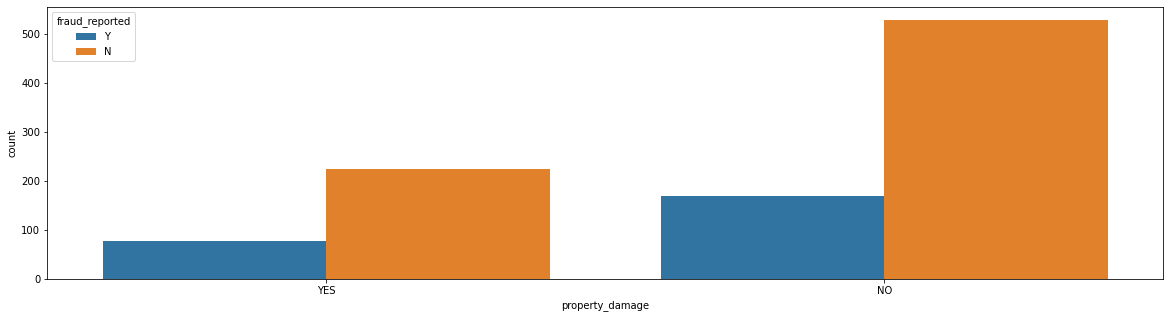

NO     686
YES    314
Name: police_report_available, dtype: int64


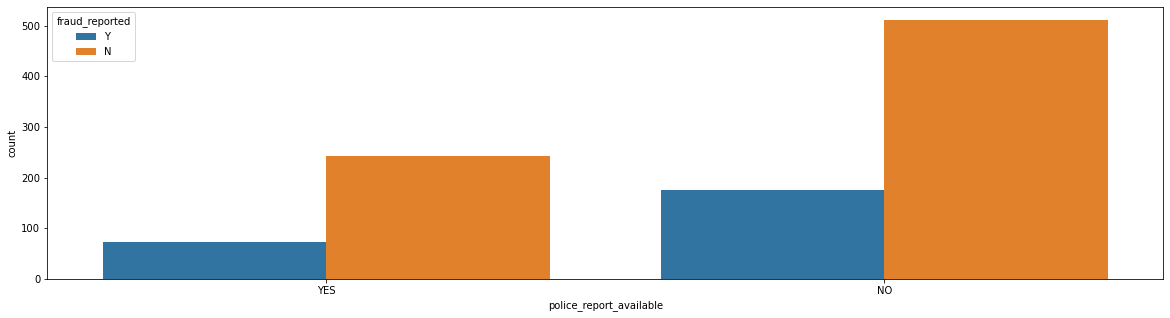

Saab          80
Suburu        80
Dodge         80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


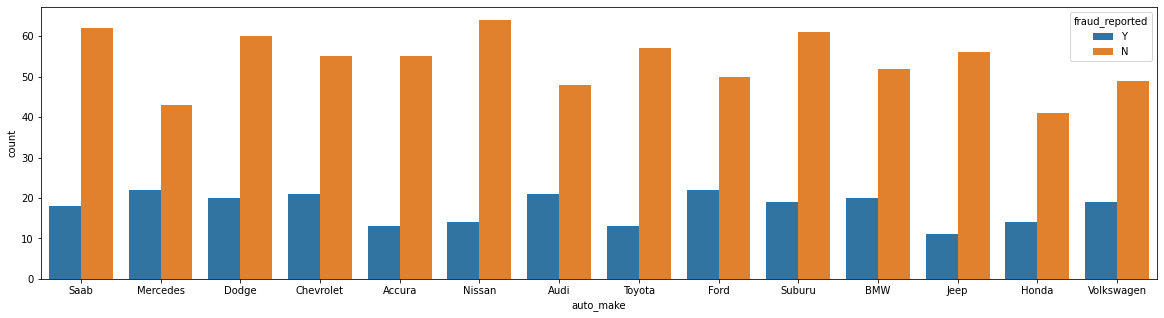

In [227]:
categ_cols_plot = ['policy_state', 'policy_csl', 'insured_sex', 
              'insured_education_level', 'insured_occupation', 'insured_hobbies', 
              'insured_relationship','incident_type', 'collision_type', 
              'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 
              'property_damage', 'police_report_available', 'auto_make']

for i in categ_cols_plot:
    plt.figure(figsize=(20,5))
    sb.countplot(x=i, hue='fraud_reported', data=df)
    print(df[i].value_counts())
    plt.show()

Observation: 
    
    We can see that there are there are high number of frauds in all three states with CH being the highest and IL being the lowest. 
    
    Women tend to avail more insurance than men while the higher number of frauds are found with Men. 
    
    Highschoolers, JD and Associates take the highest number of insurance claims while the highest number of frauds are found for MD and Highschoolers. 
    
    Machine-op-inspect, prof-speciality and priv-house-service people take more insurance claims when compared to others. Exec-managerical post people tent to make the highest fraud insurance claims.
    
    People who does golf, camping, watch a lot of movies, and does kayacking tend to take the highest insturance claims. The people who reported having chess as a hoby tend to have the highest fraud reports, seconded by people who does cross-fit training.
    
    Highest insurance claims are for husbands or own-children. 
    
    Highest insurance claims are for single vehicle collision and multi vehicle collision. 
    
    Highest number of claims are for rear_colisions
    
    Highest number of claims are for minor damanges, while the highest number of fraud claims are for Major damages. 
    
    Most of the insurance claims has had a reason to contact the cops, ambulance or the fire dept. 
    
    The highest number of insurance claims are from NY, SC, & WV. The highest number of fraud claims are from SC.
    
    The highest number of insurance claims are not for property damages. 
    
    Highest number of claims has police report available. 
    
    The highest number of claims are for Nissan, Saab, Dodge, and Subaru. 

    Encoding Fraud_report to do further plotting

In [228]:
from sklearn.preprocessing import OrdinalEncoder

In [229]:
oe = OrdinalEncoder()

In [230]:
df['fraud_reported']=enc.fit_transform(df['fraud_reported'].values.reshape(-1,1))

<Figure size 1440x360 with 0 Axes>

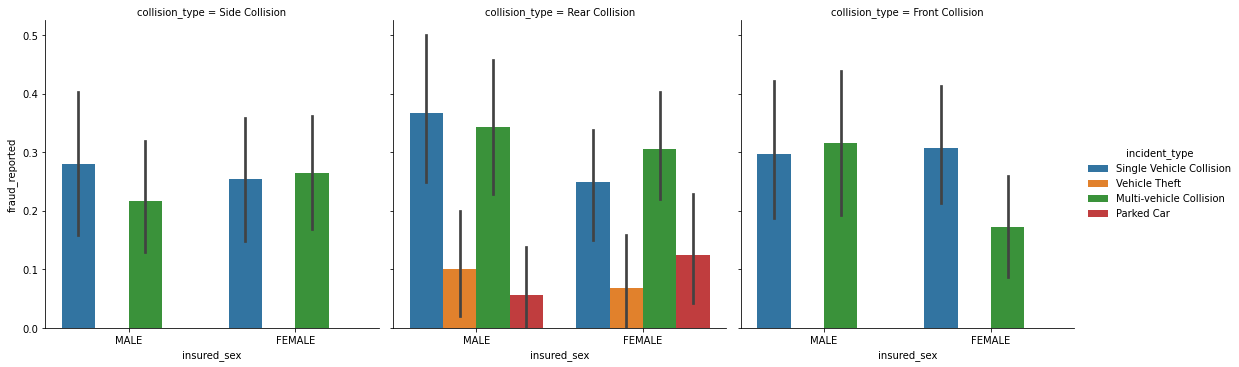

In [231]:
plt.figure(figsize=(20,5))
sb.catplot(x='insured_sex',y='fraud_reported',kind='bar',data=df,col='collision_type',hue='incident_type')

    Men tend to have higher number of collisions. 
    The different types of collisions are plotted above. 

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


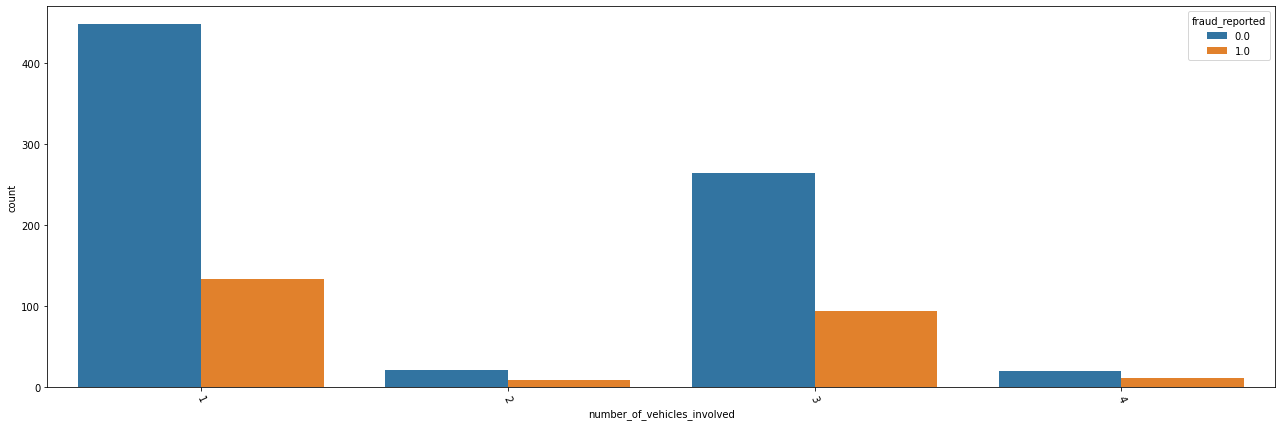

In [232]:
plt.figure(figsize = (22,7))
sb.countplot(x="number_of_vehicles_involved", hue="fraud_reported", data = df)
print(df['number_of_vehicles_involved'].value_counts())
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    We can see that the highest number of claims are for single vehicle collisions, also, where the highest number of fraud claims are made. 

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


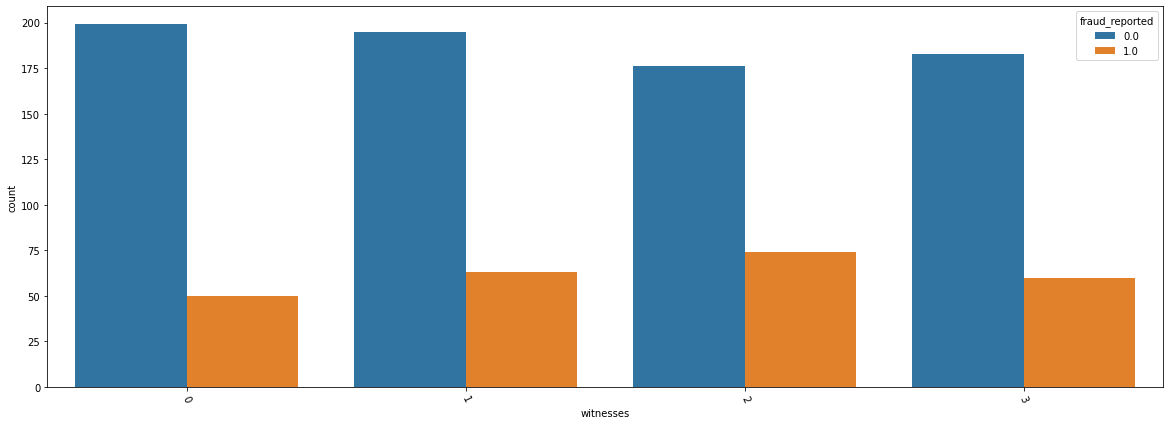

In [233]:
plt.figure(figsize=(20,7))
sb.countplot(x='witnesses', hue='fraud_reported', data=df)
print(df['witnesses'].value_counts())
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    There are almost always witnesses, sometimes upto 3 being available. 
    In most cases, there will atleast be one witness available to testify. 

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64


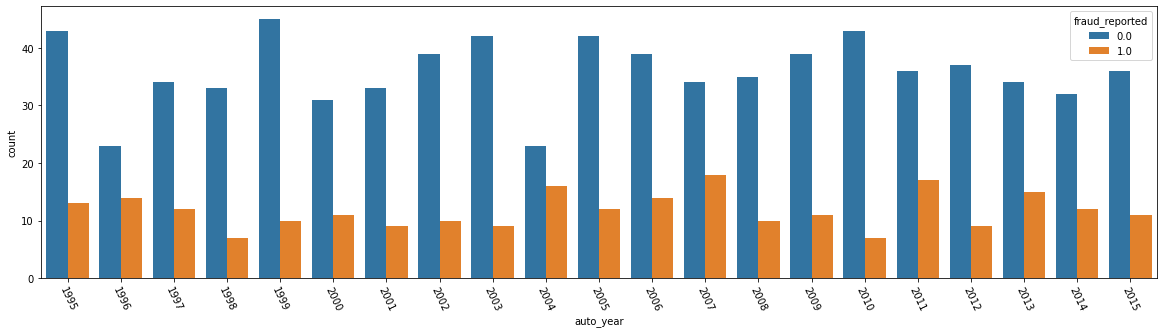

In [234]:
plt.figure(figsize=(20,5))
sb.countplot(x='auto_year', hue='fraud_reported', data=df)
print(df['auto_year'].value_counts())
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    We can see that the loweset number of claims were in 2004, also when there were a high number of fraud claims, followed by 2007, 2011.
    
    The highest number of claims were in 1999, and 2010.
    
    The lowest number of fraud claims were in 1989, 2003, and 2010. 

### Summary

In [235]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


In [236]:
df.describe(include=['object']).T

,count,unique,top,freq
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_type,1000,4,Multi-vehicle Collision,419
collision_type,1000,3,Rear Collision,470
incident_severity,1000,4,Minor Damage,354


    When looking at the object summary, we can see that the highest auto_make, which is Saab has one of the highest insurance claim rate. 

<AxesSubplot:>

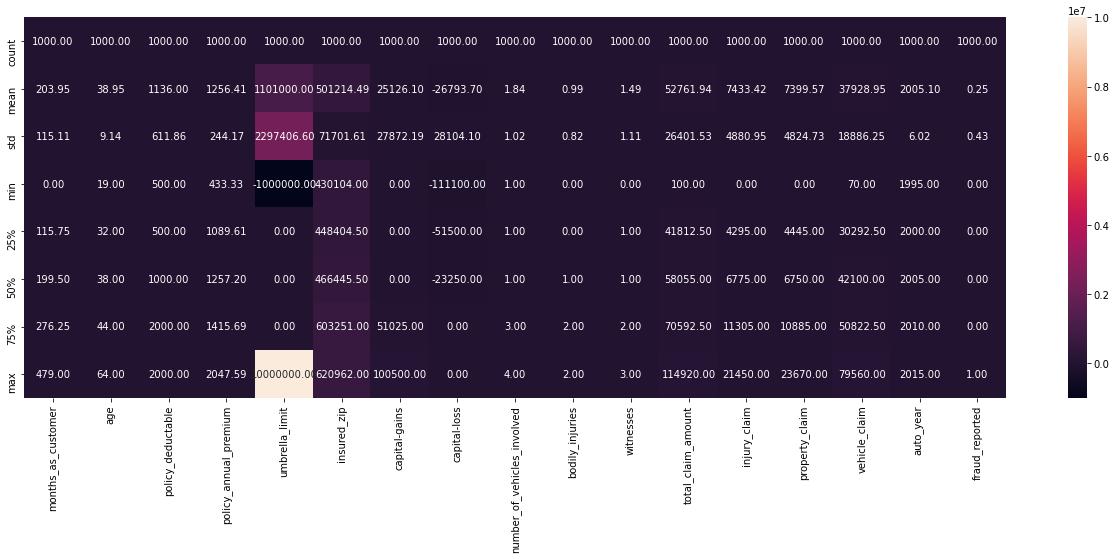

In [237]:
plt.figure(figsize = (22,7))
sb.heatmap(df.describe(), annot = True, fmt = '0.2f')

    We can see that the highest difference in mean and max values are in umbrella_limit and insured_zip. 
    
    However, all the values are in different ranges, so we will have to scale the dataset. 

### Encoding

In [238]:
#We have already called the Encoder above. 

In [239]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))

In [240]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,2.0,17.0,0.0,53300,0,2.0,2.0,0.0,4.0,4.0,1.0,1,1.0,1,2,1.0,71610,6510,13020,52080,10.0,2004,1.0
1,228,42,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,6.0,15.0,2.0,0,0,3.0,1.0,1.0,4.0,5.0,5.0,1,0.0,0,0,0.0,5070,780,780,3510,8.0,2007,1.0
2,134,29,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,11.0,2.0,3.0,35100,0,0.0,1.0,1.0,4.0,1.0,1.0,3,0.0,2,3,0.0,34650,7700,3850,23100,4.0,2007,0.0
3,256,41,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,1.0,2.0,4.0,48900,-62400,2.0,0.0,0.0,4.0,2.0,0.0,1,0.0,1,2,0.0,63400,6340,6340,50720,3.0,2014,1.0
4,228,44,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,11.0,2.0,4.0,66000,-46000,3.0,1.0,1.0,2.0,1.0,0.0,1,0.0,0,1,0.0,6500,1300,650,4550,0.0,2009,0.0


### Correlation

In [241]:
df.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.017377,-0.072787,-0.059581,0.010021,0.005369,-0.000130,0.014736,0.005488,-0.010162,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,-0.000292,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,-0.025626,-0.075642,-0.058439,0.015417,0.005770,-0.002291,0.022102,-0.003408,-0.015679,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.001354,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.031848,0.052438,-0.026377,-0.016777,0.008723,-0.002077,-0.042263,-0.008465,0.013384,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.009153,0.015788,-0.005960,-0.030063,0.005249,-0.034612,0.011997,0.020641,0.022530,0.056182,0.032814,0.009333,-0.019403,-0.027634,-0.000595,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.038411,-0.053912,-0.015711,-0.000760,0.006517,-0.045117,0.051214,0.015770,-0.022765,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.053603,0.036556,-0.011155,-0.055191,0.046434,0.048724,-0.045991,0.080738,0.026780,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,0.023422,-0.037000,0.077495,-0.047268,-0.024056,0.015966,0.010041,0.009466,0.029044,-0.077492,0.013094,-0.021270,-0.076358,0.022743,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.009893,0.058622
insured_zip,0.017895,0.025604,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,-0.069077,0.002106,-0.002355,0.006303,0.049372,-0.010840,-0.016882,-0.023855,-0.017548,-0.047669,-0.017532,0.027448,0.023861,0.028695,0.019805,0.009841,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,-0.032736,0.019368
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,-0.006160,-0.020317,0.002855,-0.020494,-0.021705,0.009952,-0.014293,-0.028168,0.017914,-0.022379,0.014470,0.018793,0.026969,-0.020297,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.016079,0.009002,1.000000,-0.020298,0.021807,-0.023488,0.039912,0.041193,0.013704,-0.019230,-0.006420,-0.010838,-0.005903,-0.018636,-0.003768,-0.048909,-0.012072,0.019211,0.051640,0.074226,0.081880,0.055794,0.068348,0.055202,0.043509,0.008808


<AxesSubplot:>

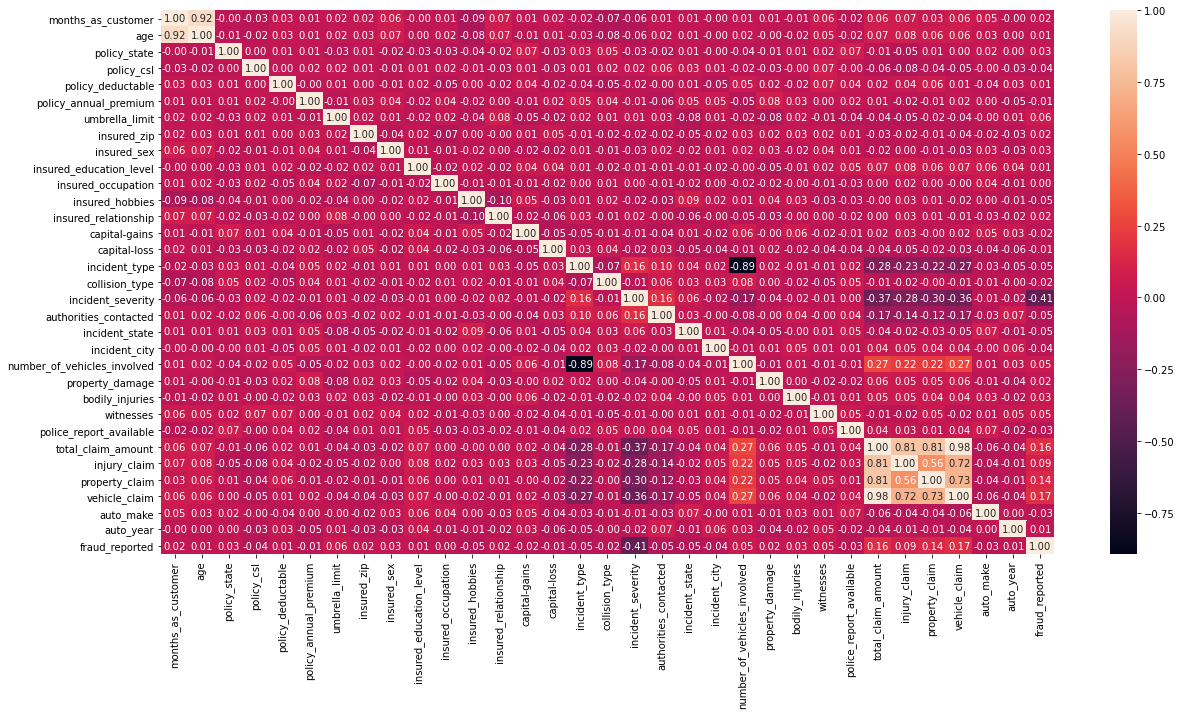

In [242]:
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f')

    Since it's difficult to extrapolate values from this graph we will plot two separate ones for high positive and high negative correlation

<AxesSubplot:>

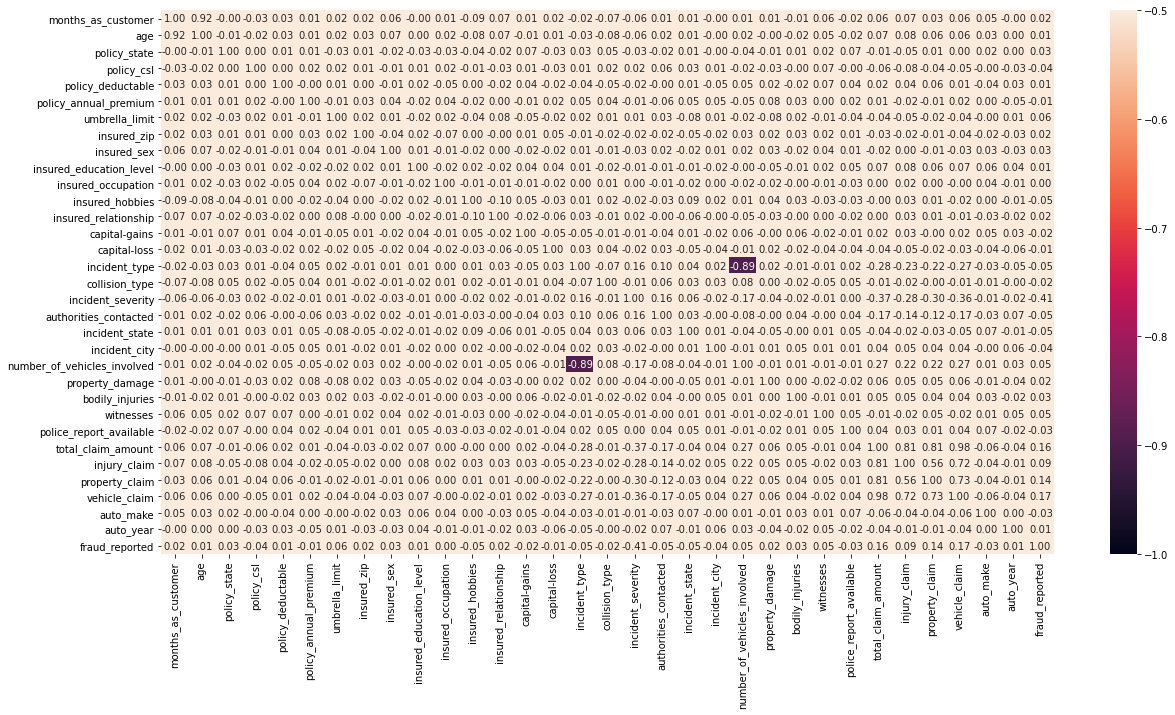

In [243]:
#Highlighting all the values lower than -0.5
#Plot to highlight high negative correlations.
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = -0.5, vmax = -1)

    We can see that Incident_type and number_of_vehicles_involved are highly negatively correlated. 

<AxesSubplot:>

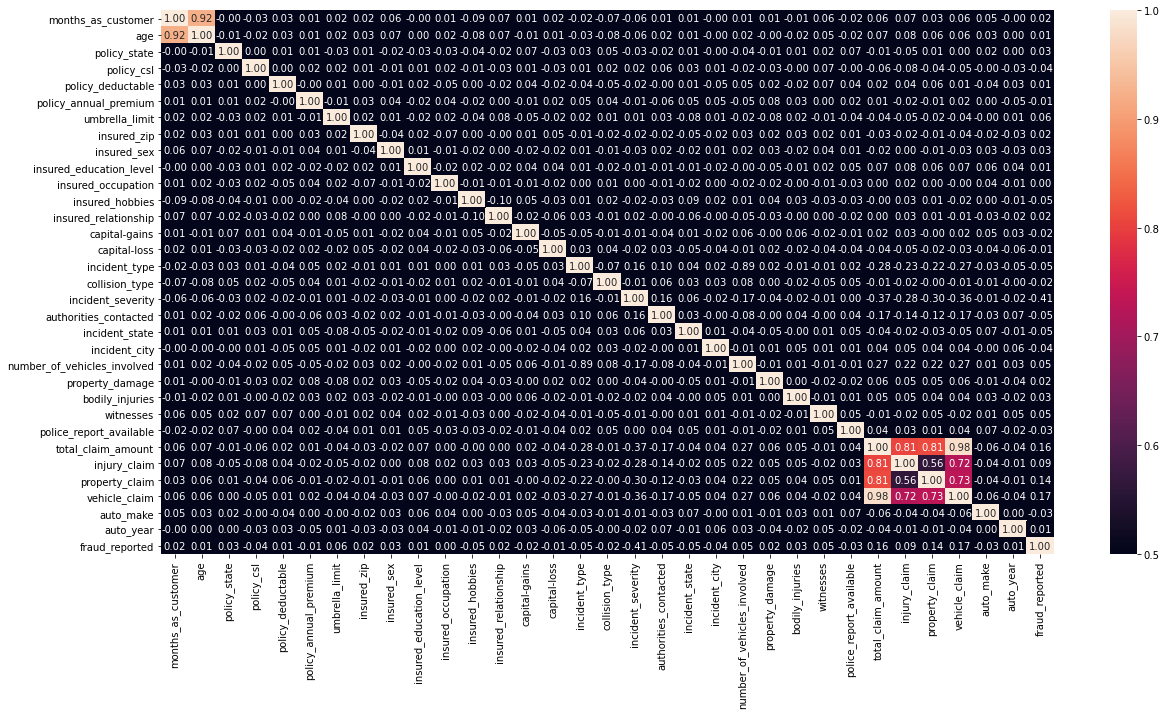

In [244]:
#Highlighting all the values greater than 0.5
#Plot to highlight high positive correlations.
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = 0.5, vmax = 1)

Observation:

    We can see that age & month_as_customer are highly correlated. 
    
    We can see that Total_claim_amount is highly correlated with Vehicle_claim, Property_claim, Injury_claim, & Total Claim amount. 
    
    In order to remove the collinearity, we can remove Vehicle_claim, property_claim, and Injury_claim.

In [245]:
df=df.drop(columns=['vehicle_claim','property_claim','injury_claim', ])

In [246]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_year,fraud_reported
0,328,48,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,2.0,17.0,0.0,53300,0,2.0,2.0,0.0,4.0,4.0,1.0,1,1.0,1,2,1.0,71610,10.0,2004,1.0
1,228,42,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,6.0,15.0,2.0,0,0,3.0,1.0,1.0,4.0,5.0,5.0,1,0.0,0,0,0.0,5070,8.0,2007,1.0
2,134,29,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,11.0,2.0,3.0,35100,0,0.0,1.0,1.0,4.0,1.0,1.0,3,0.0,2,3,0.0,34650,4.0,2007,0.0
3,256,41,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,1.0,2.0,4.0,48900,-62400,2.0,0.0,0.0,4.0,2.0,0.0,1,0.0,1,2,0.0,63400,3.0,2014,1.0
4,228,44,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,11.0,2.0,4.0,66000,-46000,3.0,1.0,1.0,2.0,1.0,0.0,1,0.0,0,1,0.0,6500,0.0,2009,0.0


### Checking for outliers

In [247]:
from scipy.stats import zscore

In [248]:
z = np.abs(zscore(df))
threshold = 3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 503, 657,
       700, 763, 807, 875, 922, 975], dtype=int64), array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6,  6,  6,  6,  5, 14,  6,
        6,  6], dtype=int64))


In [249]:
dfn = df[(z<3).all(axis=1)]
print(df.shape)
print(dfn.shape)

(1000, 30)
(981, 30)


In [250]:
# percentage of data loss.
data_loss = ((1000-981)/1000)*100
data_loss

1.9

    Since there are only less number of outliers, and the data_loss is 1.9%m we can remove them. 

In [251]:
df = dfn

In [252]:
df.shape

(981, 30)

    Since most of the variables are categorical, I'm not going to check the skewness of the model. 

### Splitting X & Y

In [253]:
x = df.drop(['fraud_reported'], axis = 1)
y = df['fraud_reported']

In [254]:
x.shape

(981, 29)

In [255]:
y.shape

(981,)

In [256]:
x.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'auto_make', 'auto_year'],
      dtype='object')

In [257]:
scale_col = ['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'auto_make', 'auto_year']

### Scaling

In [258]:
from sklearn.preprocessing import StandardScaler

In [259]:
sc = StandardScaler()

In [260]:
x = sc.fit_transform(x)

In [261]:
x = pd.DataFrame(x, columns = scale_col)
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_year
0,1.070216,0.984369,1.178383,0.065872,-0.223570,0.621168,-0.467587,-0.485254,1.072994,0.533151,-1.154711,1.275133,-1.437682,1.002902,0.954501,0.760902,1.343348,-1.260366,1.196959,0.350869,-0.974643,-0.819388,1.513918,0.001248,0.464781,1.471229,0.716940,0.852529,-0.188317
1,0.204305,0.330788,-0.025777,0.065872,1.413162,-0.246525,1.891997,-0.456624,1.072994,0.533151,-0.159087,0.923508,-0.248002,-0.907244,0.954501,1.687013,-0.030817,-0.195406,1.196959,0.814755,0.990670,-0.819388,-0.660538,-1.222563,-1.333838,-0.679704,-1.809519,0.355601,0.310977
2,-0.609650,-1.085304,1.178383,-1.176823,1.413162,0.646948,1.891997,-0.982496,-0.931972,1.557678,1.085444,-1.362053,0.346839,0.350657,0.954501,-1.091319,-0.030817,-0.195406,1.196959,-1.040786,-0.974643,1.145942,-0.660538,1.225058,1.364090,-0.679704,-0.686395,-0.638257,0.310977
3,0.446760,0.221858,-1.229938,0.065872,1.413162,0.657707,2.363914,1.503505,-0.931972,1.557678,-1.403618,-1.362053,0.941679,0.845217,-1.279151,0.760902,-1.404982,-1.260366,1.196959,-0.576901,-1.465971,-0.819388,-0.660538,0.001248,0.464781,-0.679704,0.405214,-0.886722,1.475995
4,0.204305,0.548648,-1.229938,1.308566,-0.223570,1.353591,2.363914,1.539768,1.072994,-1.515903,1.085444,-1.362053,0.941679,1.458040,-0.692101,1.687013,-0.030817,-0.195406,-0.107726,-1.040786,-1.465971,-0.819388,-0.660538,-1.222563,-0.434529,-0.679704,-1.755223,-1.632115,0.643839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,-1.743993,-0.104933,1.178383,1.308566,-0.223570,0.223467,-0.467587,-0.973293,-0.931972,1.045414,-1.154711,0.571883,0.941679,-0.907244,0.954501,0.760902,-1.404982,-0.195406,-0.760069,-1.504672,0.499342,-0.819388,1.513918,-1.222563,-0.434529,-0.679704,1.308877,-0.141328,0.144546
977,0.697874,0.221858,-1.229938,-1.176823,-0.223570,0.744811,-0.467587,1.504345,-0.931972,1.557678,0.587632,1.275133,1.536519,1.633645,0.954501,0.760902,-0.030817,-1.260366,-0.760069,0.350869,0.008014,-0.819388,1.513918,1.225058,1.364090,-0.679704,2.116858,1.597923,1.642426
978,-0.644287,-0.540653,1.178383,0.065872,-1.041936,0.524257,0.948164,-0.812103,-0.931972,1.045414,-1.403618,-1.186241,-0.248002,0.350657,0.954501,-1.091319,1.343348,-0.195406,1.196959,-1.504672,-1.465971,1.145942,-0.660538,1.225058,1.364090,1.471229,0.560887,1.100994,-1.519765
979,2.195899,2.509392,-1.229938,1.308566,1.413162,0.414311,1.891997,-0.827272,1.072994,-1.515903,-0.407993,-1.713678,1.536519,-0.907244,0.954501,0.760902,-0.030817,-1.260366,0.544616,-1.040786,-1.465971,-0.819388,-0.660538,-1.222563,-0.434529,1.471229,-0.218237,-1.383651,-1.186903


### Importing the models

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [263]:
lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
abc = AdaBoostClassifier()

In [264]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 50)

In [265]:
x_train.shape

(686, 29)

In [266]:
x_test.shape

(295, 29)

In [267]:
y_train.shape

(686,)

In [268]:
y_test.shape

(295,)

In [269]:
model = [lr, gnb, svc, rfc, dtc, knc, abc]
for m in model: 
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    print('Accuracy Score  : ', m)
    print(accuracy_score(y_test, pred))
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))

Accuracy Score  :  LogisticRegression()
0.7322033898305085
[[195  28]
 [ 51  21]]
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       223
         1.0       0.43      0.29      0.35        72

    accuracy                           0.73       295
   macro avg       0.61      0.58      0.59       295
weighted avg       0.70      0.73      0.71       295

Accuracy Score  :  GaussianNB()
0.7016949152542373
[[178  45]
 [ 43  29]]
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80       223
         1.0       0.39      0.40      0.40        72

    accuracy                           0.70       295
   macro avg       0.60      0.60      0.60       295
weighted avg       0.70      0.70      0.70       295

Accuracy Score  :  SVC()
0.7593220338983051
[[221   2]
 [ 69   3]]
              precision    recall  f1-score   support

         0.0       0.76      0.99      0.86       223
         1.0  

### Cross Validation

In [270]:
from sklearn.model_selection import cross_val_score

In [271]:
model = [lr, gnb, svc, rfc, dtc, knc, abc]
for m in model:
    print(m)
    i = []
    for a in range (2,10):
        score = cross_val_score(m, x, y, cv = a)
        k = score.mean()
        i.append(k)
    print(i)
    print('CV Value = ', i.index(max(i))+2)
    print('Best Score =' , max(i))
    print('\n')

LogisticRegression()
[0.7726796624963631, 0.762487257900102, 0.7624771859963497, 0.7675593079871543, 0.7594393735348396, 0.7655521783181357, 0.7625533120085299, 0.7675840978593274]
CV Value =  2
Best Score = 0.7726796624963631


GaussianNB()
[0.7686125774138576, 0.7512742099898063, 0.7492409158785465, 0.7563607168755828, 0.7645518479724674, 0.7635258358662613, 0.7595128615220579, 0.762487257900102]
CV Value =  2
Best Score = 0.7686125774138576


SVC()
[0.7533106114136082, 0.7543323139653415, 0.7441305790608927, 0.7461669947166684, 0.7482231033966782, 0.7471848313793602, 0.7451685992269759, 0.7482161060142711]
CV Value =  3
Best Score = 0.7543323139653415


RandomForestClassifier()
[0.7818529448439253, 0.7767584097859327, 0.7706238592998175, 0.7706205324769502, 0.7798393934859594, 0.776776668114054, 0.7747234439557511, 0.7757390417940877]
CV Value =  2
Best Score = 0.7818529448439253


DecisionTreeClassifier()
[0.7879546115798661, 0.7787971457696229, 0.7879625020740003, 0.78897234020511

### Re-running the best model

In [272]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print('Accuracy score: ')
print(accuracy_score(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

Accuracy score: 
0.7559322033898305
[[194  29]
 [ 43  29]]
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       223
         1.0       0.50      0.40      0.45        72

    accuracy                           0.76       295
   macro avg       0.66      0.64      0.64       295
weighted avg       0.74      0.76      0.75       295



    We got the best model as Random Forest Classifer with an accuracy of 75%

### AUC_ROC Curve

In [273]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [274]:
y_pred_prob = lr.predict_proba(x_test)[:, 1]

In [275]:
y_pred_prob

array([0.21464161, 0.49385049, 0.05526188, 0.07453368, 0.25588755,
       0.26013422, 0.4880873 , 0.08155418, 0.49063344, 0.24044118,
       0.02106872, 0.03256975, 0.66178105, 0.19663455, 0.29729678,
       0.34030634, 0.67796127, 0.04923706, 0.23947196, 0.49811502,
       0.12589543, 0.04529458, 0.03139163, 0.26193607, 0.04370394,
       0.34666605, 0.38394945, 0.05464127, 0.40185651, 0.32163504,
       0.24061282, 0.27513912, 0.50233238, 0.47674512, 0.07950993,
       0.48535509, 0.28193731, 0.22055424, 0.23249288, 0.55335428,
       0.08101588, 0.28687723, 0.08278046, 0.48943725, 0.46058639,
       0.04910499, 0.11260139, 0.19907428, 0.53681392, 0.17200185,
       0.42142539, 0.01041513, 0.43618895, 0.06542716, 0.50476324,
       0.11969426, 0.51580744, 0.24238121, 0.48323702, 0.18647623,
       0.01860709, 0.41764424, 0.01256061, 0.13484083, 0.61726894,
       0.32294944, 0.05037896, 0.13434285, 0.5682419 , 0.64241071,
       0.05907273, 0.64252412, 0.52222179, 0.22421808, 0.15615

In [276]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [277]:
fpr

array([0.        , 0.0044843 , 0.0044843 , 0.00896861, 0.00896861,
       0.01793722, 0.01793722, 0.02242152, 0.02242152, 0.02690583,
       0.02690583, 0.03587444, 0.03587444, 0.06726457, 0.06726457,
       0.07174888, 0.07174888, 0.08520179, 0.08520179, 0.10313901,
       0.10313901, 0.11659193, 0.11659193, 0.12107623, 0.12107623,
       0.13004484, 0.13004484, 0.13901345, 0.13901345, 0.14349776,
       0.14349776, 0.15695067, 0.15695067, 0.16591928, 0.16591928,
       0.17488789, 0.17488789, 0.18834081, 0.18834081, 0.19282511,
       0.19282511, 0.19730942, 0.19730942, 0.20627803, 0.20627803,
       0.21973094, 0.21973094, 0.22421525, 0.22421525, 0.22869955,
       0.22869955, 0.25112108, 0.25112108, 0.26457399, 0.26457399,
       0.30941704, 0.30941704, 0.367713  , 0.367713  , 0.39013453,
       0.39013453, 0.43946188, 0.43946188, 0.46188341, 0.46188341,
       0.49327354, 0.49327354, 0.49775785, 0.49775785, 0.51121076,
       0.51121076, 0.52466368, 0.52466368, 0.53811659, 0.53811

In [278]:
tpr

array([0.        , 0.        , 0.02777778, 0.02777778, 0.04166667,
       0.04166667, 0.05555556, 0.05555556, 0.08333333, 0.08333333,
       0.09722222, 0.09722222, 0.11111111, 0.11111111, 0.13888889,
       0.13888889, 0.20833333, 0.20833333, 0.25      , 0.25      ,
       0.26388889, 0.26388889, 0.27777778, 0.27777778, 0.29166667,
       0.29166667, 0.30555556, 0.30555556, 0.33333333, 0.33333333,
       0.41666667, 0.41666667, 0.43055556, 0.43055556, 0.47222222,
       0.47222222, 0.5       , 0.5       , 0.51388889, 0.51388889,
       0.55555556, 0.55555556, 0.59722222, 0.59722222, 0.625     ,
       0.625     , 0.63888889, 0.63888889, 0.65277778, 0.65277778,
       0.66666667, 0.66666667, 0.68055556, 0.68055556, 0.69444444,
       0.69444444, 0.70833333, 0.70833333, 0.72222222, 0.72222222,
       0.73611111, 0.73611111, 0.75      , 0.75      , 0.77777778,
       0.77777778, 0.80555556, 0.80555556, 0.81944444, 0.81944444,
       0.83333333, 0.83333333, 0.84722222, 0.84722222, 0.86111

In [279]:
thresholds

array([1.75474606, 0.75474606, 0.70772841, 0.6943145 , 0.69255592,
       0.66178105, 0.65372461, 0.64252412, 0.63545427, 0.62620961,
       0.62125306, 0.61726894, 0.60596205, 0.58101818, 0.5761563 ,
       0.57397338, 0.56097865, 0.55142872, 0.54093296, 0.52222179,
       0.5181794 , 0.50738431, 0.50655092, 0.50476324, 0.50233238,
       0.49811502, 0.49385049, 0.48943725, 0.48937026, 0.4880873 ,
       0.47456117, 0.46298347, 0.46254328, 0.45651788, 0.44394919,
       0.43618895, 0.43095199, 0.42303149, 0.42142539, 0.41764424,
       0.41022711, 0.40761327, 0.40185651, 0.3978282 , 0.39621852,
       0.38332783, 0.37494063, 0.36493981, 0.3626757 , 0.35493283,
       0.35294268, 0.33413024, 0.32761989, 0.31937574, 0.31808427,
       0.28193731, 0.28136984, 0.24044118, 0.23980221, 0.23462531,
       0.23249288, 0.20414953, 0.20376831, 0.19663455, 0.19378102,
       0.1818853 , 0.18105183, 0.17579979, 0.1736889 , 0.15615639,
       0.1526635 , 0.14914721, 0.14571246, 0.13484083, 0.13438

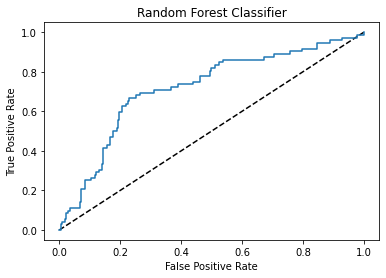

In [280]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label = 'Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [281]:
auc_score = roc_auc_score(y_test, lr.predict(x_test))

In [282]:
print(auc_score)

0.5830530642750373


    We're getting the auc roc score as 58%

### GridSearchCV

In [283]:
from sklearn.model_selection import GridSearchCV

In [284]:
parameters = {'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [10, 50, 100]}
rfc = RandomForestClassifier()
rfccv = GridSearchCV(rfc, parameters, cv = 8)
rfccv.fit(x_train, y_train)

print(rfccv.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}


In [285]:
rfc_final = RandomForestClassifier(criterion = 'entropy', max_features = 'auto', n_estimators = 50)
rfc_final.fit(x_train, y_train)
pred_rfc = rfc_final.predict(x_test)
print('Accuracy Score  : ', rfc_final)
print(accuracy_score(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

Accuracy Score  :  RandomForestClassifier(criterion='entropy', n_estimators=50)
0.7728813559322034
[[200  23]
 [ 44  28]]
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       223
         1.0       0.55      0.39      0.46        72

    accuracy                           0.77       295
   macro avg       0.68      0.64      0.66       295
weighted avg       0.75      0.77      0.76       295



    We're getting an accuracy of 76% after running GridSearchCV

In [286]:
data = [pred_rfc, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294
Predicted,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Actual,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating OBJ File

In [287]:
import joblib

In [288]:
joblib.dump(pred_rfc, 'Customer_churn.obj')

['Customer_churn.obj']